# Problem Set 4, due Fri, May 1st, midnight

## Before You Start

This problem set is about pandas (and python).  Unlike all the other
problem sets in this course, I ask you to solve this one in _python_
in _notebooks_.

Please submit
* this notebook (as .ipynb)
* html (or pdf) 'final version' of it


## Collaboration

Working together is useful and fun.  However,

* please list all your collaborators' names below here and
* submit your own work.  Copy-pasting is not ok.

collaborators:

* ...

## Readings:

This problem set assumes you can work with pandas.  Consult McKinney
Ch 5 _Getting Started with pandas_ (chapter numbering varies between
                                    editions).  Matplotlib is briefly
discussed in McKinney Ch 9.  Ch 10: _Data Aggregation and Group
Operations_ explains the, well, grouped operations.


In [221]:
# Let's import the important packages.  Depending on how do your
# exactly proceed, you may need more than these here.  

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)

import seaborn as sns

Numpy version:        1.15.4
SciPy version:         1.1.0
Pandas version:       0.23.4
Maplotlib version:     3.0.2
Scikit-Learn version: 0.20.1


---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data
Set](http://lib.stat.cmu.edu/datasets/boston).  Please read
about the dataset carefully before continuing -- it is worth investing
a few minutes up front otherwise you are likely to be hopelessly
confused! 



In [222]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [223]:
print( bdata.keys())
print( bdata.feature_names)
print( bdata.data.shape)
print( bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [224]:
boston = pd.DataFrame(bdata.data)

In [225]:
boston.columns = bdata.feature_names[:]
print( boston.shape)
print(boston.head())

(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The
first thing to do is to make sure you understand how the data is
organized, what the data types are, whether there is any missing data,
and so forth. Get your bearings on your own, then answer the following
questions.

- a: The data is split in two chunks: _data_ and _target_.  Create a
  data frame that combines both chunks.  The following questions
  concern this new data frame.
- b: How many different variables are there in the data frame you just
  created, and
     how many different observations?  
- c: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
- d: Show that dataset does not contain any missing values.
- e: Display the property tax rate in the 5 neighborhoods that have
     the lowest median housing price.


In [226]:
# enter your code here

newdf = pd.DataFrame(boston)
newdf['target'] = bdata.target

print("\n a: ")
print(newdf.shape)

print("\n b: ")
print(len(newdf.loc[newdf['CHAS'] > 0]))

print("\n c: ")
print(newdf.isnull().sum())

print( "\n d: ")
print(newdf.sort_values(by=['target']).head(5)['TAX'])




 a: 
(506, 14)

 b: 
35

 c: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

 d: 
398    666.0
405    666.0
400    666.0
399    666.0
414    666.0
Name: TAX, dtype: float64


*Provide our answers below:*

 - a: Data frame created above.
 - b: 14 variables, 506 observations.
 - c: 35 instances are classified as neighborhoods where the tract bounds the Charles River.
 - d: There are no missing values.
 - e:  The property tax rate in the 5 neighborhoods that have the lowest median housing price is displayed above, for all 5 neighborhods it is 666.0.
 

### 1.2: Answer some basic questions about the data

 - 1.2 a: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2 b: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2 c: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2 d: Are homes in old neighborhoods smaller?  Compare the average
          number of rooms in the 5 oldest and 5 youngest neighborhood.

In [261]:
# enter your code here

print(max(newdf.target))

print(len(newdf.loc[newdf['RM'] > 0]))

chs = newdf.loc[newdf['CHAS'] == 1]

print(chs.loc[chs['target'] ==  max(chs.target)].TAX)

print(newdf.sort_values(by=['AGE']).head(5)['RM'])

print(newdf.sort_values(by=['AGE']).tail(5)['RM'])

50.0
506
162    403.0
163    403.0
283    198.0
369    666.0
370    666.0
372    666.0
Name: TAX, dtype: float64
41    6.770
74    6.273
73    6.245
43    6.211
70    6.417
Name: RM, dtype: float64
386    4.652
158    6.066
383    5.520
406    4.138
420    6.411
Name: RM, dtype: float64


*Provide our answers below:*

 - 1.2.1: 50
 - 1.2.2: 506
 - 1.2.3: 403, 198, 666
 - 1.2.4: Yes
 - 1.2.5: Older houses have less rooms on average compared to newer houses. Looking at the top five newest and top five oldest, newer houses have about 6 rooms, whereas older houses have from 4-6 rooms.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following
information (no more, no less) for each variable in the dataset.  Your
table should have K rows (one for each variable) and 7
columns, ordered as below:

- The name of the variable
- The number of observations with non-missing values
- The mean of the variable
- The standard deviation of the variable
- The minimum value of the variable
- The median of the variable
- The maximum value of the variable

In [262]:
# enter your code here

a = newdf.describe(percentiles=[])
a

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1.4 Grouped Operations

In these exercise, you **have to use _groupby_** grouping operator.

#### 1.4.1 Price and number of rooms

How does the average house price depend on the number of rooms?
Compute the mean price by number of rooms.  Note: as this is _average
number of rooms_, you have to convert it to an integer, or make it
categorical in another way.


In [135]:
## compute it here.  Use 'groupy' operator!
newdf['RM'] = newdf['RM'].astype(int)

newdf.groupby('RM').mean()['target']

RM
3    25.300000
4    16.023077
5    17.487342
6    22.015985
7    36.917647
8    44.200000
Name: target, dtype: float64

#### 1.4.2 size and location

But the price may not just depend on the size but also on location.
Analyze the average price depending on size (as above), depending on
whether the neighborhood is adjacent to Charles river or not.

In [136]:
## analyze it here, use groupby
noriver = newdf.loc[newdf['CHAS'] == 0]
river = newdf.loc[newdf['CHAS'] == 1]
noriver.groupby('RM').mean()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
RM,,,,,,,,,,,,,
3,9.039035,0.000000,18.100000,0.0,0.674500,93.950000,1.561900,24.000000,666.000000,20.200000,243.060000,10.225000,25.300000
4,14.620847,0.000000,17.696923,0.0,0.693846,93.376923,1.508346,19.538462,597.692308,19.215385,320.564615,26.590769,16.023077
5,5.154990,5.125850,13.329932,0.0,0.578258,73.971429,3.481890,9.877551,433.455782,19.151020,347.978776,16.726939,17.133333
6,2.959713,12.227273,10.624150,0.0,0.539770,64.733597,4.104611,9.644269,408.201581,18.635573,355.112530,11.327866,21.769170
7,0.989850,32.355556,4.934000,0.0,0.495202,57.333333,4.459762,5.422222,306.600000,16.184444,389.057778,6.014000,35.964444
8,0.395549,16.090909,4.940000,0.0,0.517009,68.472727,3.684164,6.181818,287.000000,16.163636,387.703636,4.310909,45.700000


In [137]:
river.groupby('RM').mean()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
RM,,,,,,,,,,,,,
5,1.671577,1.818182,13.860,1.0,0.609091,82.945455,2.814064,7.909091,365.545455,17.781818,381.679091,17.082727,22.218182
6,2.040776,5.000000,12.465,1.0,0.609750,78.268750,2.970294,10.500000,404.312500,17.631250,361.198125,10.828750,25.918750
7,1.462567,28.333333,9.265,1.0,0.498483,61.833333,3.915617,7.000000,326.666667,16.600000,389.045000,3.946667,44.066667
8,2.496650,0.000000,18.840,1.0,0.661500,88.400000,2.033350,14.500000,534.500000,17.450000,371.500000,4.305000,35.950000


## Part 2: Histograms and Scatterplots

### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic
histogram of median housing prices (the "target" variable) for your
dataset.  Your first task is to make this graph look pretty by doing
the following:

1. Add appropriate titles and labels to, make sure to explain the units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black
borders from the bars
5. Ensure the histogram does not result in printing incomprehensible list of numbers in the output cell as this sample code does. 


Text(0.5, 1.0, 'Median Value of Houses in Boston')

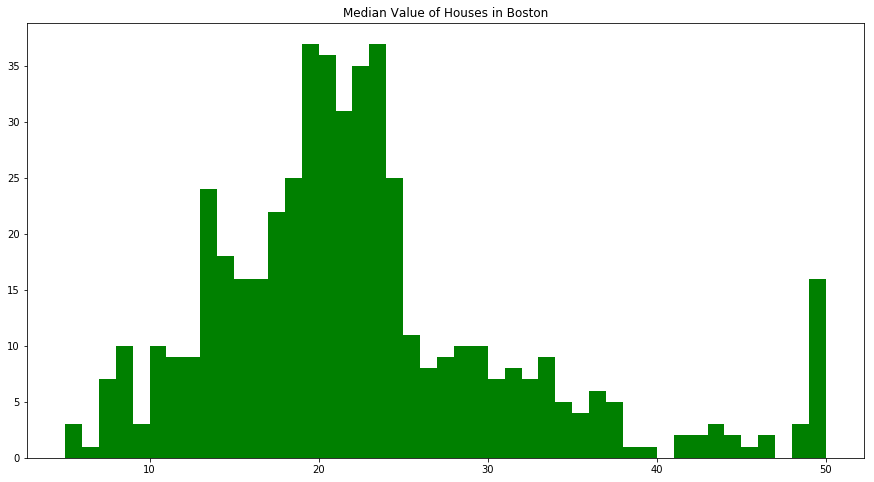

In [195]:
# edit the code below to make the graph look good
bins = np.linspace(5,50, 46)

fig = plt.subplots(figsize=(15, 8))
plt.hist(bdata.target, color='green', bins=bins)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Median Value of Houses in Boston')

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.


Text(0.5, 1.0, 'Relationship Between the Median Value of Homes and the Per-Capita Crime Rate of Boston')

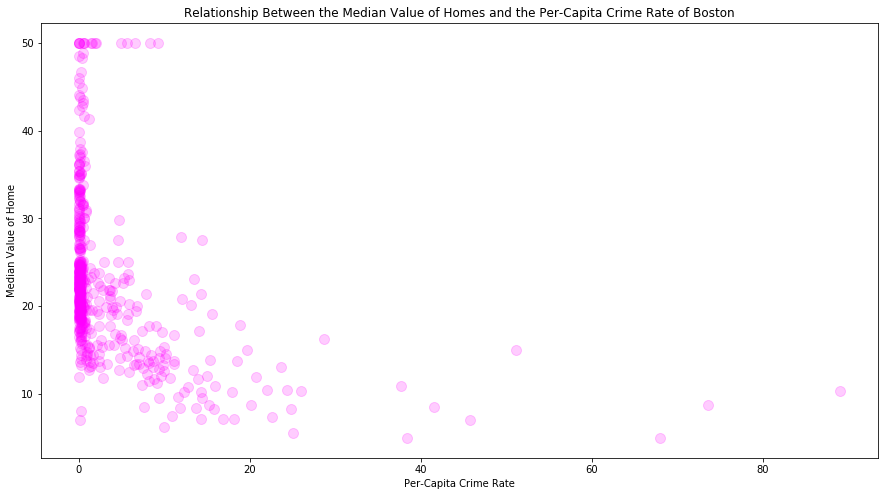

In [186]:
# enter your code here
fig, ax = plt.subplots(figsize=(15, 8))

ax.scatter(newdf.CRIM, bdata.target, s=100, color='magenta', alpha=.2)
plt.xlabel('Per-Capita Crime Rate')
plt.ylabel('Median Value of Home')
plt.title('Relationship Between the Median Value of Homes and the Per-Capita Crime Rate of Boston')


### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be
a relationship between crime rates and housing prices in Boston?
Calculate the correlation between these two variables. Do you think
this relationship is causal, or just a correlation?   Can you provide
examples of all 3 ways the causality may go here?

In [198]:
# compute correlation (should be b/w -1 and 1)

np.corrcoef(newdf['CRIM'], bdata['target'])

array([[ 1.        , -0.38830461],
       [-0.38830461,  1.        ]])

*Write your thoughts here (1-2 paragraphs).*

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the
dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*)
cell is the correlation between the *i*th and *j*th variable. Show off
your skills by coloring the cell so that large positive correlations
appear green and large negative correlations appear red (use a
gradient to make this pretty). What two variables appear to me most
positively and negatively correlated?

In [199]:
# enter your code here
## hint: check out matplotlib colorbar function

newdf.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.216039,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.271762,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.356320,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.068294,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.259478,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.216039,0.271762,-0.356320,0.068294,-0.259478,1.000000,-0.200498,0.182281,-0.184688,-0.255715,-0.344208,0.139852,-0.557114,0.621692
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.200498,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.182281,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.184688,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.255715,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


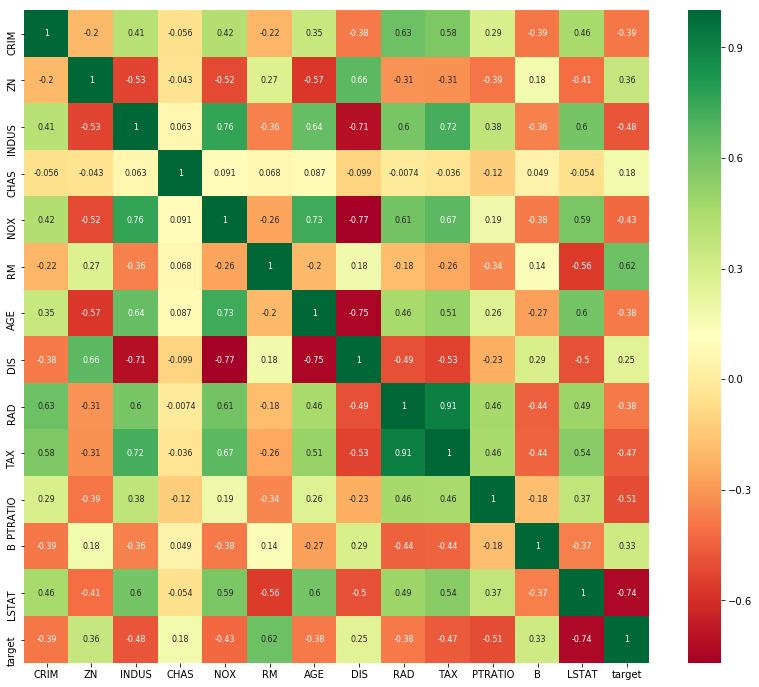

In [220]:
#Create a correlation heat map

plt.figure(figsize=(14, 12))
sns.heatmap((newdf).corr(), annot=True, annot_kws={"size": 8}, cmap="RdYlGn")

*Write your response here.*

TAX and RAD are the most positively correlated, and NOX and DIS the most negatively correlated.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting
pattern in the data.  Be creative in your visualization, and make sure
to produce a "publication-quality" graph.  Points will be given for
useful and creative graphs; points will be deducted for confusing
issues like unlabeled axes.  If you're new to data visualization,
[this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209)
is a good place to start.

Text(0.5, 1, 'Relationship Between NOX and DIS')

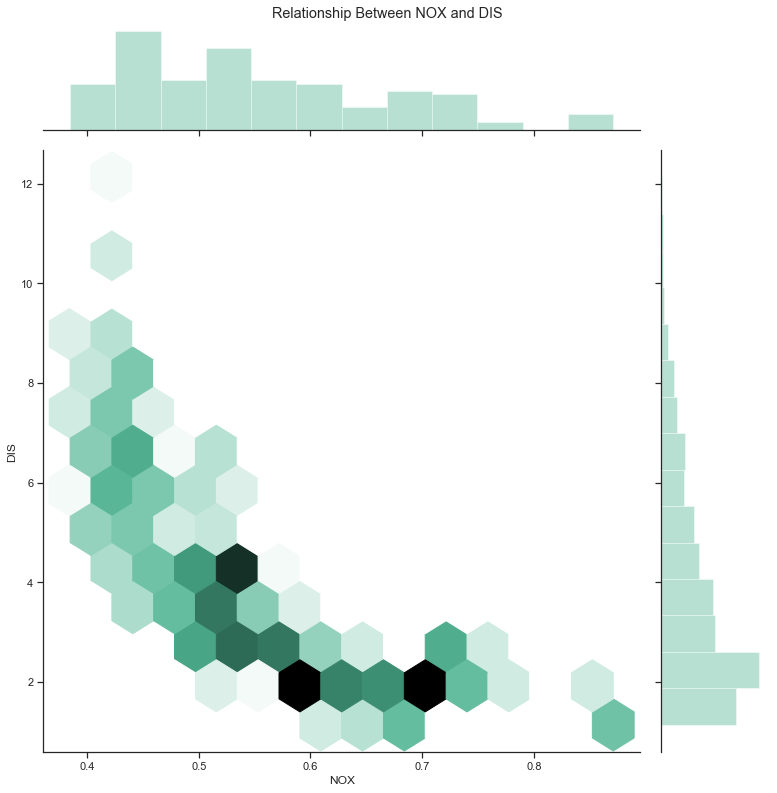

In [288]:
# enter your code here
nox = newdf.NOX
dis= newdf.DIS

g = sns.jointplot(tax, rad, kind="hex", color="#4CB391", height=11)
g.fig.suptitle("Relationship Between NOX and DIS", y=1)

## 3. How much time did you spend?

Finally, tell us how many hours did you spend solving this problem set?

3 or so hours